<a href="https://colab.research.google.com/github/haianle/linear-regression/blob/main/challenges/02%20-%20Real%20Estate%20Regression%20Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [9]:
import pandas as pd

# load the training dataset
1+1
url = 'https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/master/challenges/data/real_estate.csv'
data = pd.read_csv(url)
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

In [11]:
# Your code to explore data and train a regression model
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


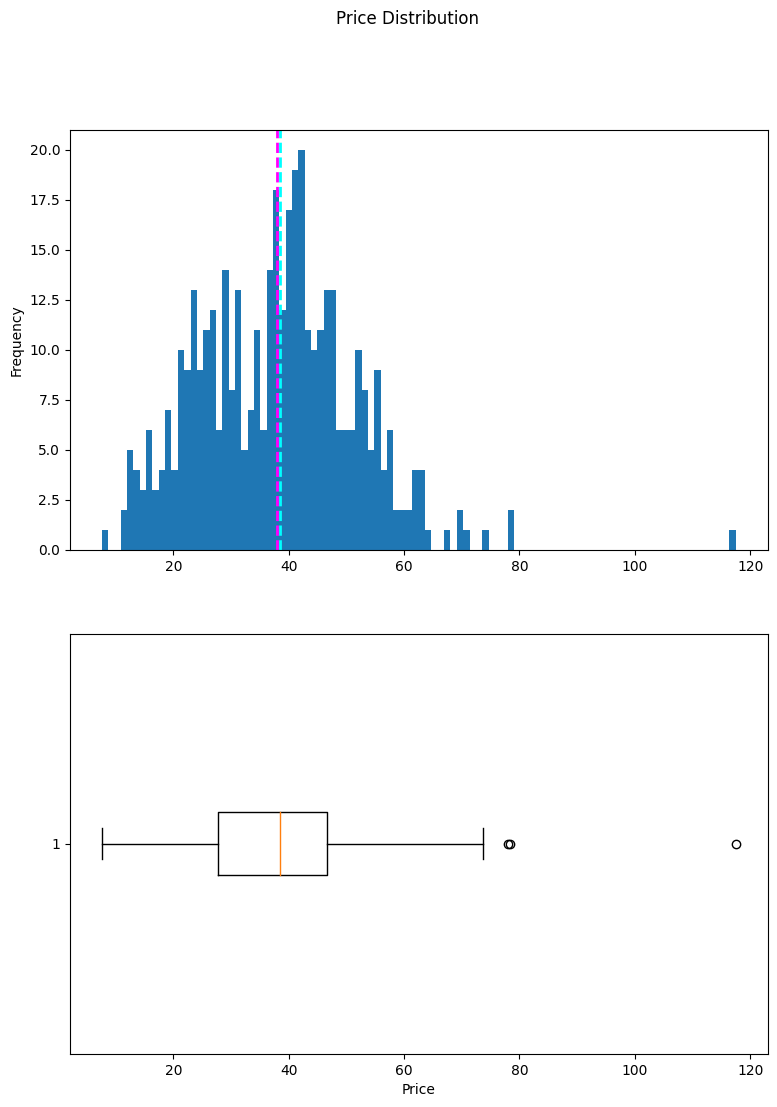

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = data['price_per_unit']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Price')

# Add a title to the Figure
fig.suptitle('Price Distribution')

# Show the figure
fig.show()


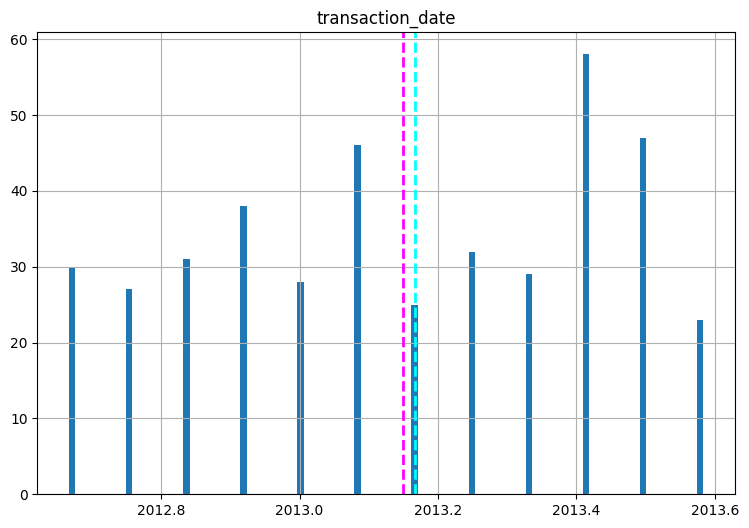

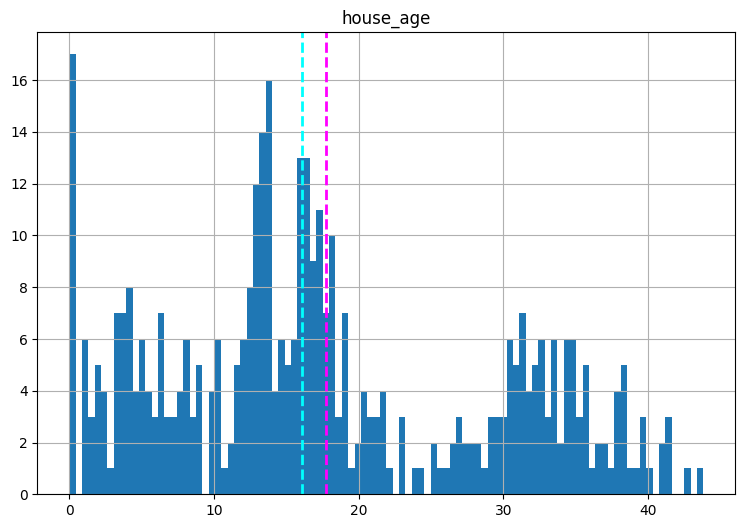

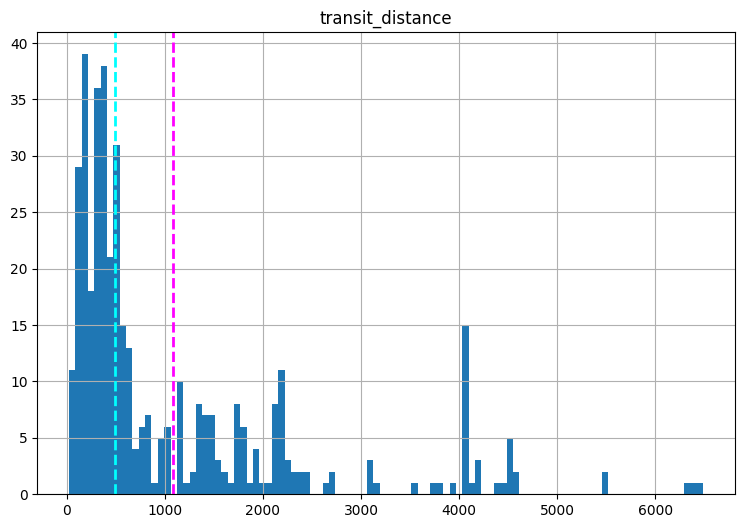

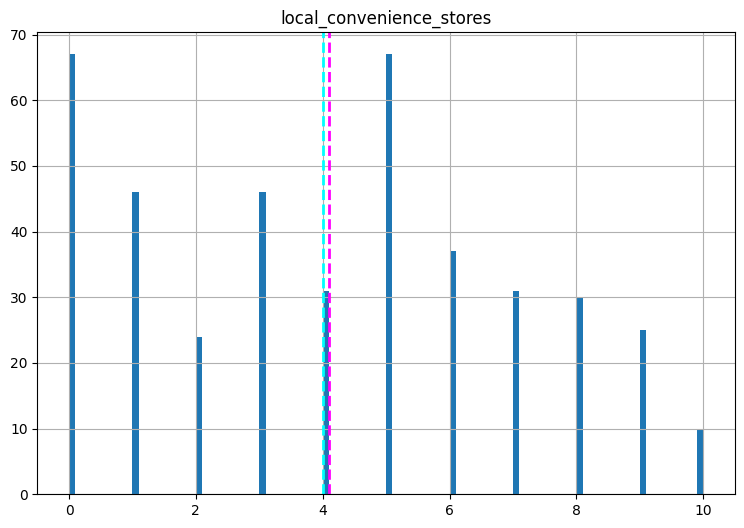

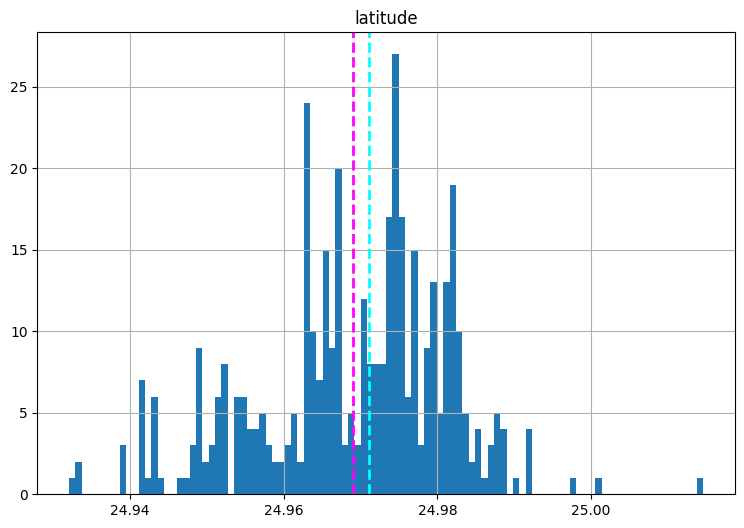

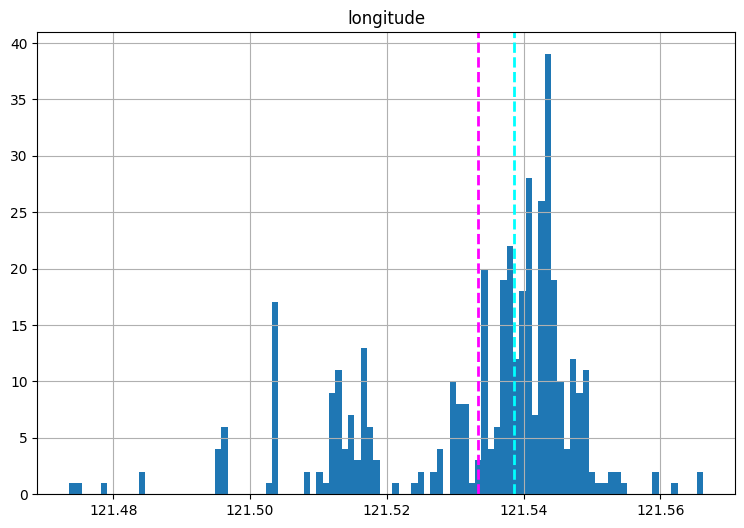

In [16]:
# Plot a histogram for each numeric feature
#data.head()
numeric_features = data.columns.drop ('price_per_unit')

for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

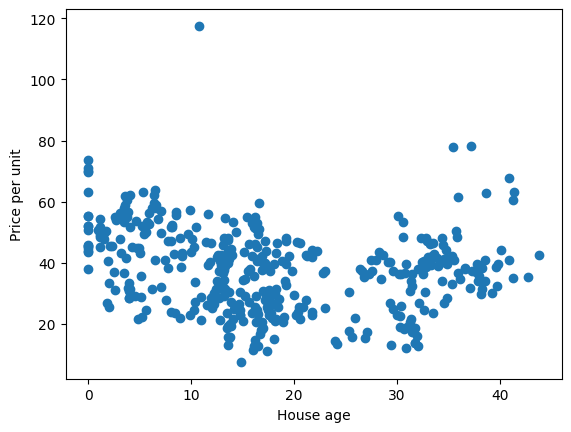

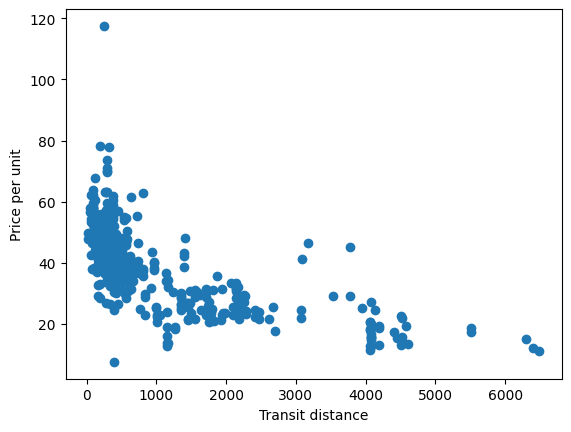

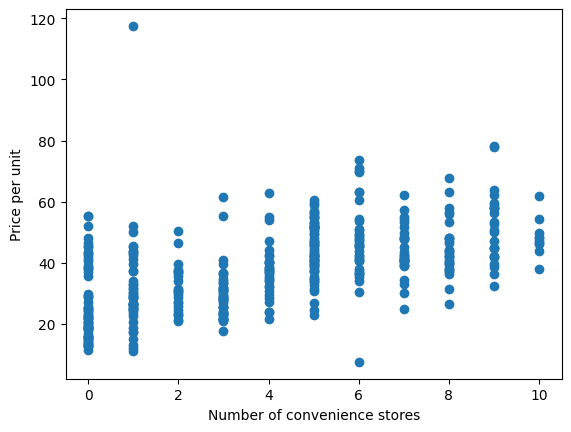

In [17]:
# prompt: scatter plots between columns

# Scatter plot between 'house_age' and 'price_per_unit'
plt.scatter(data['house_age'], data['price_per_unit'])
plt.xlabel('House age')
plt.ylabel('Price per unit')
plt.show()

# Scatter plot between 'transit_distance' and 'price_per_unit'
plt.scatter(data['transit_distance'], data['price_per_unit'])
plt.xlabel('Transit distance')
plt.ylabel('Price per unit')
plt.show()

# Scatter plot between 'local_convenience_stores' and 'price_per_unit'
plt.scatter(data['local_convenience_stores'], data['price_per_unit'])
plt.xlabel('Number of convenience stores')
plt.ylabel('Price per unit')
plt.show()


In [29]:
# prompt: train a regression model to predict price_per_unit, using all features

# Create a model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

model = LinearRegression()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('price_per_unit', axis=1), data['price_per_unit'], test_size=0.25)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred)
print('RMSE:', rmse)

# Save the model
!mkdir models
!cp model.joblib models/


array([40.4844946 , 47.25103297, 33.49182821, 15.60120368, 28.07268448,
       48.16521972, 13.12162654, 30.72109457, 44.46432067, 36.52265931,
       23.80793238, 37.58364179, 42.72909188, 34.00753779, 36.81596091,
       33.88575877, 40.08248765, 49.46900745, 43.39663605, 44.54495399,
       39.54232736, 12.2454769 , 27.53486215, 37.87938259, 47.11175516,
       51.03658313, 32.02970947, 33.76149223, 43.29970916, 42.87421888,
       39.02905088, 36.16812307, 44.21421248, 24.35347747, 45.47244226,
       38.21523458, 46.92701029, 35.2179463 , 29.27849188, 14.81683824,
       16.16265089, 48.75867443, 33.51375248, 28.35385488, 37.26093823,
       43.14423536, 30.15201933, 54.37622785, 31.39183269, 28.92531969,
       46.72039127, 43.46441106, 43.38691227, 34.74977316, 42.29456288,
       45.68809673, 40.14751832, 47.96268682, 43.57672992, 47.12568596,
       38.36983588, 53.47380841, 36.50570406, 37.28914112, 13.20293941,
       48.2633419 , 44.68130919, 46.4631479 , 46.78460352, 33.50

In [32]:
# prompt: calculate r^2 between test and predictions

r2 = r2_score(y_test, y_pred)
print("R2:", r2)


R2: 0.6031671227627801


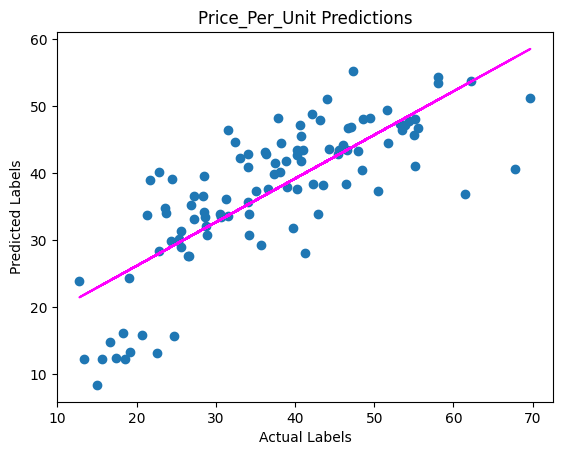

In [33]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price_Per_Unit Predictions')
# overlay the regression line
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [ ]:
# Your code to use the trained model